## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 16s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 37s 18s/step - loss: 5.1855 - accuracy: 0.2656 - val_loss: 18.4026 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 33s 17s/step - loss: 9.7009 - accuracy: 0.3750 - val_loss: 12.5901 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 35s 17s/step - loss: 7.5327 - accuracy: 0.3906 - val_loss: 1.4489 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 34s 17s/step - loss: 3.3975 - accuracy: 0.3594 - val_loss: 5.8736 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 34s 17s/step - loss: 6.2343 - accuracy: 0.4531 - val_loss: 7.3581 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 34s 17s/step - loss: 6.0827 - accuracy: 0.3281 - val_loss: 3.3302 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 35s 17s/step - loss: 2.9681 - accuracy

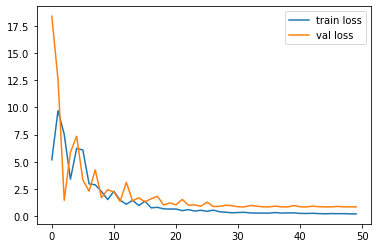

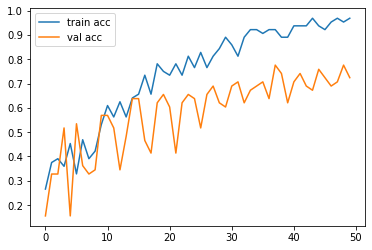

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[7.59385675e-02, 4.39479202e-01, 4.84582245e-01],
       [3.97407152e-02, 9.35605168e-01, 2.46540606e-02],
       [3.99509370e-02, 5.41906536e-01, 4.18142557e-01],
       [1.86347263e-03, 8.04454267e-01, 1.93682209e-01],
       [6.65372312e-01, 2.79786587e-01, 5.48411496e-02],
       [2.56032180e-02, 6.08861208e-01, 3.65535587e-01],
       [7.05446452e-02, 5.45680225e-01, 3.83775115e-01],
       [3.71949941e-01, 5.85892022e-01, 4.21580821e-02],
       [1.08781785e-01, 2.20537651e-02, 8.69164407e-01],
       [4.23428193e-02, 7.43930638e-01, 2.13726610e-01],
       [4.40111607e-02, 3.57589708e-03, 9.52412903e-01],
       [2.35568747e-01, 2.76715577e-01, 4.87715662e-01],
       [6.23594709e-02, 5.11837721e-01, 4.25802708e-01],
       [7.51286326e-03, 5.09935498e-01, 4.82551634e-01],
       [3.04199457e-02, 7.75616586e-01, 1.93963513e-01],
       [1.41128659e-01, 6.22289062e-01, 2.36582264e-01],
       [3.96819860e-01, 4.43723887e-01, 1.59456283e-01],
       [1.23360213e-02, 3.02687

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [30]:
model.predict(img_data)

array([[0.00284743, 0.00245399, 0.9946985 ]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])

In [36]:
a

array([2], dtype=int64)